<a href="https://colab.research.google.com/github/AyaseErii/Hardware_for_modern_day_computing/blob/main/Q8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given 20 nodes, there are 1048576 combinations in total.
Frequency distribution is shown below:


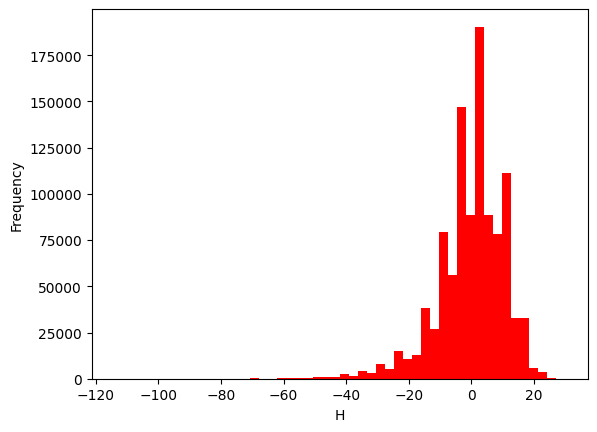

In [50]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import itertools

adj_matrix = pd.read_excel('Adjacency_Matrix_Q8B.xlsx')
#adj_matrix = pd.read_excel('4by4.xlsx')
adj_matrix = np.array(adj_matrix)

# Generate all combinations of node with given length of adj_matrix
combinations = list(itertools.product([-1, 1], repeat=len(adj_matrix)))

# Calculate H and put all H in a list H_lis
def ising_hamiltonian(adj_matrix, combinations):
    H_lis = []
    for S in combinations:
      H = 0
      for i in range(len(S)):
          for j in range(i+1, len(S)):
              if adj_matrix[i][j] == 1:
                  H -= S[i] * S[j]
      H_lis.append(H)
    return H_lis

# Return a H_lis with L
L = ising_hamiltonian(adj_matrix, combinations)

print("Given %d nodes, there are %d combinations in total." % (len(adj_matrix), len(L)))
print("Frequency distribution is shown below:")
# Plot the frequency distribution
plt.hist(L, bins=50, color="r")
plt.xlabel('H')
plt.ylabel('Frequency')
plt.show()

The minimum value of H observed over all the runs is: -56.


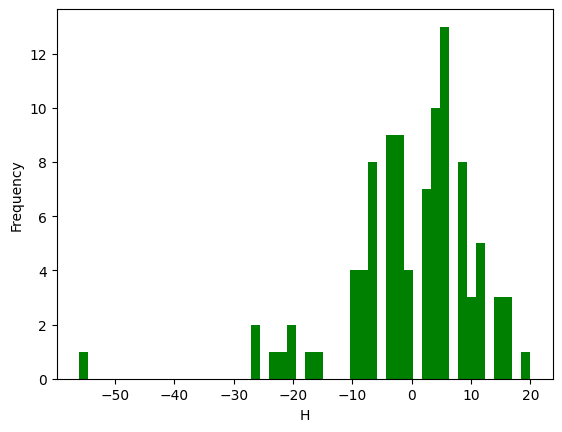

In [61]:
import random

def sampling(combinations, n, seeds):
    random.seed(seeds)
    sampled_lis = random.sample(combinations, n)
    return sampled_lis

# Put seeds to generate the a specific list
seeds = 1

# Set run time is 100
n = 100

# Start sampling
Sample_sigma_lis = sampling(combinations, n, seeds)

# Calculate H, put all H in a list H_lis and return the results into a list
sub_H_lis = ising_hamiltonian(adj_matrix, Sample_sigma_lis)

min_H = min(sub_H_lis)

print("The minimum value of H observed over all the runs is: %d." % min_H)

plt.hist(sub_H_lis, bins=50, color="green")
plt.xlabel('H')
plt.ylabel('Frequency')
plt.show()   